In [144]:
#importing required libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
from pandas import read_csv
from sklearn.model_selection import train_test_split
import keras
from keras.datasets import fashion_mnist 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans 

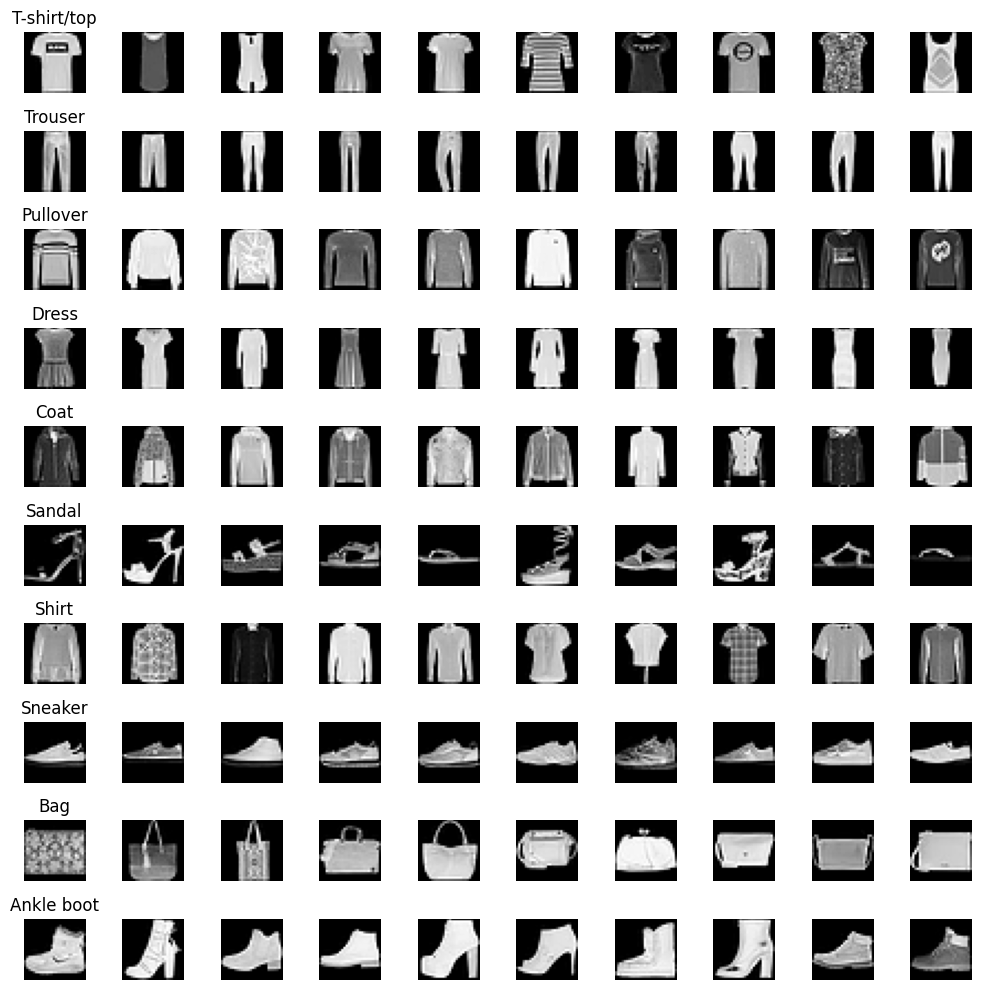

In [145]:
# load the Fashion-MNIST dataset
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

# define the categories of the dataset
categories = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal',
              'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# create a grid of images for each category
fig, axs = plt.subplots(nrows=len(categories), ncols=10, figsize=(10, len(categories)))

for i, category in enumerate(categories):
    # select all the images in the current category
    x_category = x_train[y_train == i]

    # plot the first 10 images in the current category
    for j in range(10):
        axs[i, j].imshow(x_category[j], cmap='gray')
        axs[i, j].axis('off')
        if j == 0:
            axs[i, j].set_title(category)

plt.tight_layout()
plt.show()

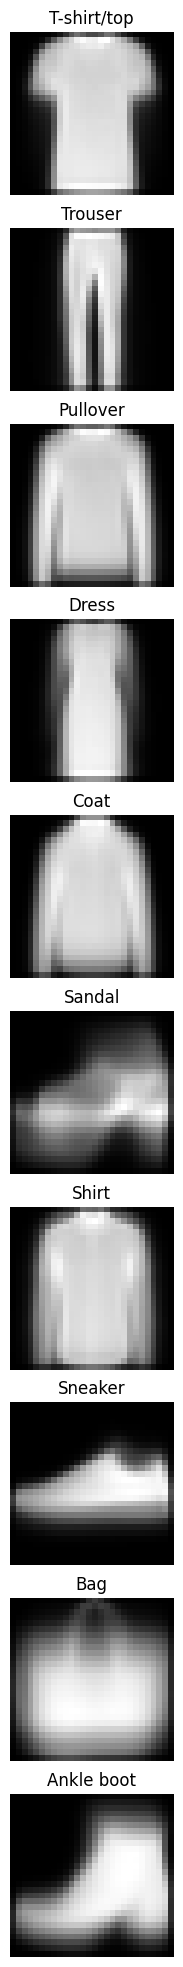

In [146]:
import numpy as np
import matplotlib.pyplot as plt
# load the Fashion-MNIST dataset
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

# define the categories of the dataset
categories = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal',
              'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# create a grid of images for each category
fig, axs = plt.subplots(nrows=len(categories), ncols=1, figsize=(10, len(categories)*2.5))

for i, category in enumerate(categories):
    # select all the images in the current category
    x_category = x_train[y_train == i]
    
    # calculate the mean image for the current category
    mean_image = np.mean(x_category, axis=0)
    
    # plot the mean image
    axs[i].imshow(mean_image, cmap='gray')
    axs[i].set_title(category)
    axs[i].axis('off')

plt.show()


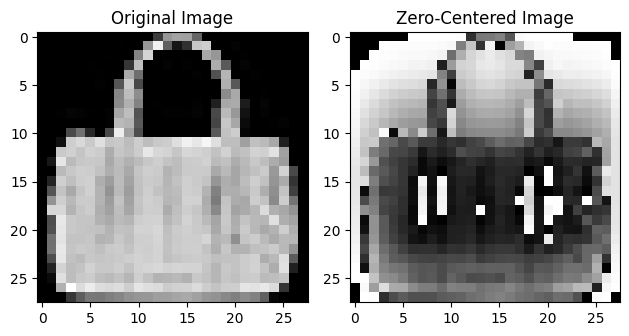

In [147]:
import numpy as np
import matplotlib.pyplot as plt

# define the categories of the dataset
categories = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal',
              'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# create an empty array to store the zero-centered images
x_train_zero_centered = np.zeros_like(x_train)

for i, category in enumerate(categories):
    # select all the images in the current category
    x_category = x_train[y_train == i]
    
    # calculate the mean image for the current category
    mean_image = np.mean(x_category, axis=0)
    
    # subtract the mean image from each image in the current category
    x_category_zero_centered = x_category - mean_image
    
    # assign the zero-centered images to the corresponding indices in the array
    x_train_zero_centered[y_train == i] = x_category_zero_centered

# display an example image before and after zero-centering
example_index = 4000
example_image = x_train[example_index]
example_image_zero_centered = x_train_zero_centered[example_index]

# plot the original image
plt.subplot(1, 2, 1)
plt.imshow(example_image, cmap='gray')
plt.title('Original Image')

# plot the zero-centered image
plt.subplot(1, 2, 2)
plt.imshow(example_image_zero_centered, cmap='gray')
plt.title('Zero-Centered Image')

plt.tight_layout()
plt.show()

In [148]:

# calculate the covariance matrix of the zero-centered images
covariance_matrix = np.cov(x_train_zero_centered.reshape(-1, 784), rowvar=False)

In [149]:
eigenvalues, eigenvectors = np.linalg.eig(covariance_matrix) # calculating the eigen values and their corresponding eigen vectors for the covariance matrix

In [150]:
#sorting the eigen values and the corresponding eigen vectors in descending order
sort_indices = np.argsort(eigenvalues)[::-1]
eigenvalues = eigenvalues[sort_indices]
eigenvectors = eigenvectors[:, sort_indices]

In [151]:
#reducing the dimensions from 784 to 400
n_components = 400
eigenvector_subset = eigenvectors[:,0:n_components]
print(eigenvector_subset.shape)

(784, 400)


In [152]:
num_components = 400  #Set the number of principal components to keep after dimensionality reduction
#Select the eigenvectors corresponding to the first 'num_components' largest eigenvalues, which explain most of the data variance
projection_matrix = eigenvectors[:, :num_components] 
x_train_reduced = np.dot(x_train_zero_centered.reshape(-1, 784), projection_matrix)#Project the zero-centered data onto the selected eigenvectors to obtain the reduced dataset
print(x_train_reduced.shape)  #Print the shape of the reduced dataset to confirm the number of dimensions has been reduced

(60000, 400)


In [153]:
x_train_reconstructed = np.dot(x_train_reduced, projection_matrix.T)  #reconstruct the images in the original feature space.
# add back the mean image to get the final reconstructed images
mean_image = mean_image.reshape(1, -1)  #reshapes mean_image from a 1D array to a 2D array with a single row.
x_train_reconstructed += mean_image

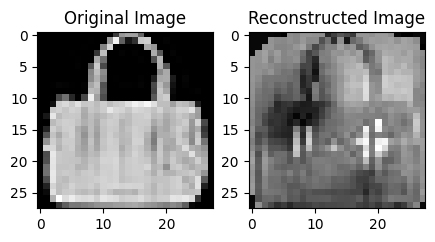

In [154]:
# select an image index to visualize
image_idx = 4000

# visualize the original image
plt.figure(figsize=(5,5))
plt.subplot(1, 2, 1)
plt.imshow(x_train[image_idx], cmap='gray')
plt.title('Original Image')

# visualize the reconstructed image
plt.subplot(1, 2, 2)
plt.imshow(x_train_reconstructed[image_idx].reshape(28, 28), cmap='gray')
plt.title('Reconstructed Image')

plt.show()

In [155]:
#initializing a KMeans clustering model
k_means = KMeans(init="k-means++", n_clusters=10, n_init=100)

In [156]:
#fiting the data to our k_means model
k_means.fit(x_train_reduced)

KMeans(n_clusters=10, n_init=100)

In [157]:
# Obtaining the labels of each dataset from k-means clustering
k_means_labels = k_means.labels_

# Printing the list of unique cluster labels
unique_labels = np.unique(k_means_labels)
print("The list of labels of the clusters are: ", unique_labels)

The list of labels of the clusters are:  [0 1 2 3 4 5 6 7 8 9]


In [158]:
# setting the number of clusters
num_clusters = len(np.unique(k_means_labels))

# Initializing an empty 2D list to hold the indices of the data points in each cluster
cluster_index = [[] for _ in range(num_clusters)]

# Iterating over the labels and indices, and append each index to the appropriate cluster
for i, label in enumerate(k_means_labels):
    cluster_index[label].append(i)

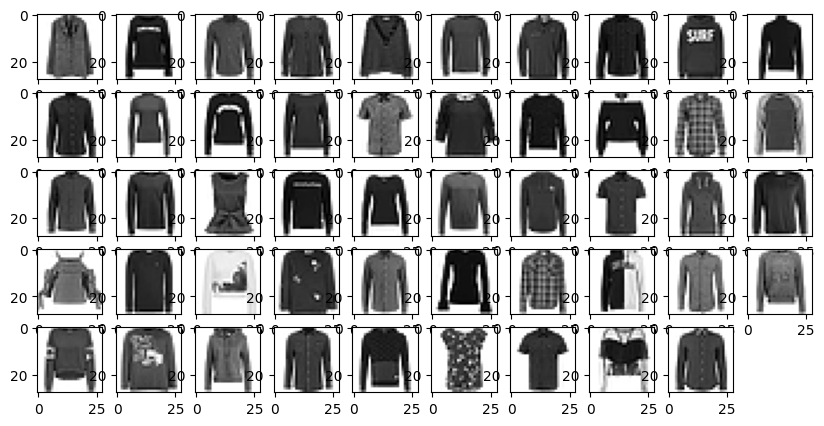

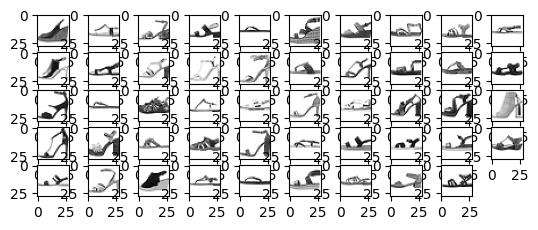

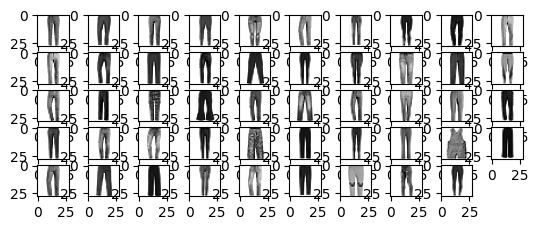

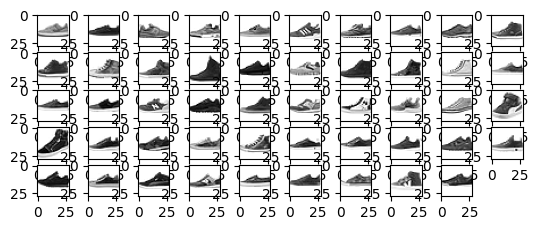

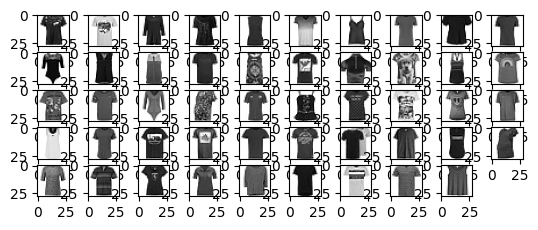

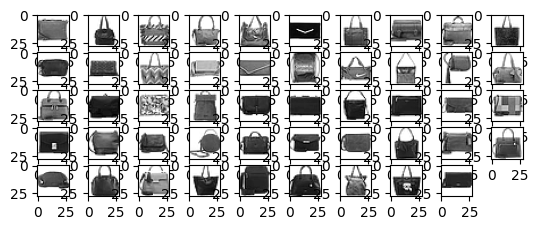

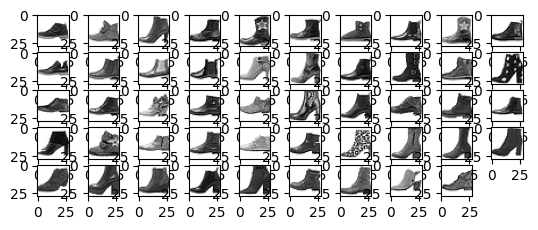

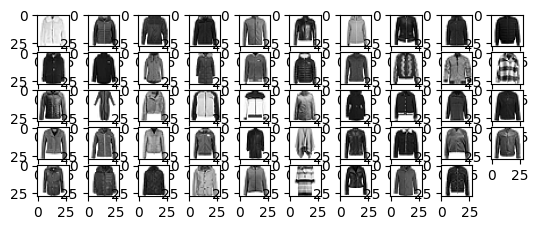

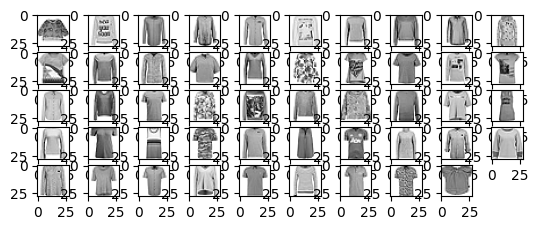

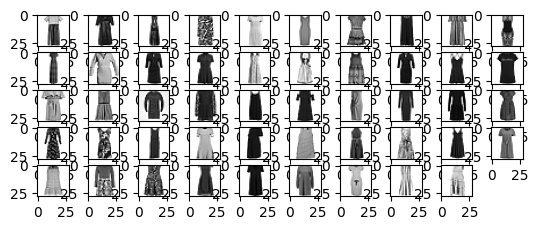

In [159]:
x_train_2d = x_train.reshape(x_train.shape[0], -1)
#Visualisation for clusters
plt.figure(figsize=(10,10));
for i in range(num_clusters):
  clust = i #enter label number to visualise
  num = 50 #num of data to visualize from the cluster
  for j in range(1,num): 
    plt.subplot(10, 10, j); #(Number of rows, Number of column per row, item number)
    plt.imshow(x_train_2d[cluster_index[clust][j+500]].reshape(x_train.shape[1], x_train.shape[2]), cmap = plt.cm.binary);
  plt.show()

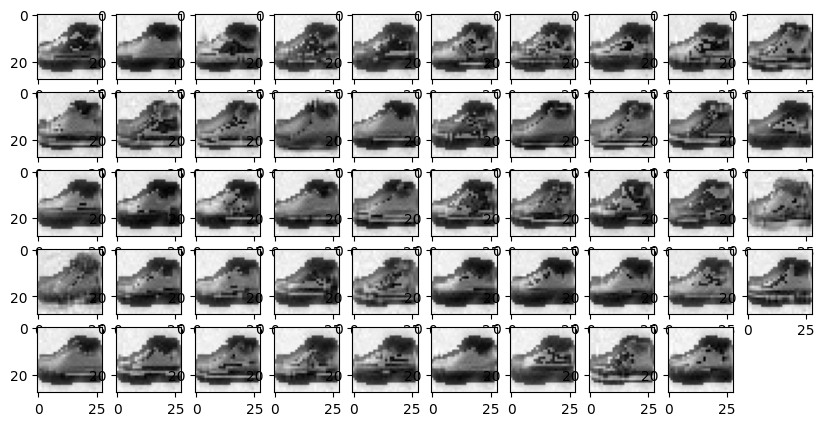

In [163]:
#Visualisation for clusters
plt.figure(figsize=(10,10));
clust = 3 #enter label number to visualise
num = 50 #num of data to visualize from the cluster
for j in range(1,num):
  plt.subplot(10, 10, j); #(Number of rows, Number of column per row, item number)
  plt.imshow(x_train_reconstructed[cluster_index[clust][j+500]].reshape(x_train.shape[1], x_train.shape[2]), cmap = plt.cm.binary);
plt.show()

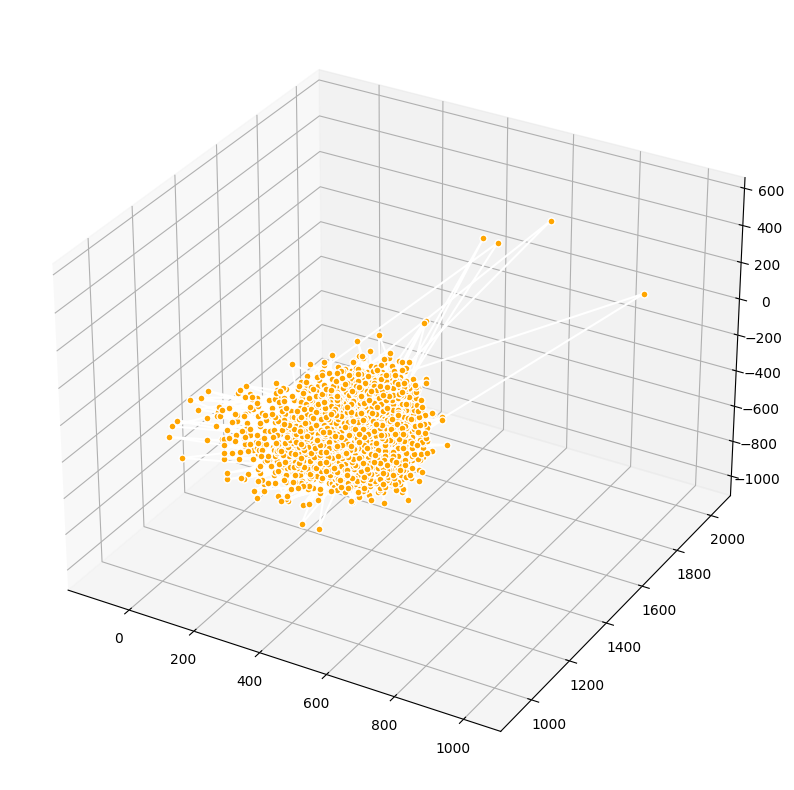

In [161]:
# Cluster visualisation
# Enter different cluster number to view its 3D plot
cluster_num = 3  # Set the cluster number to visualize
my_members = (k_means_labels == cluster_num)  # Get boolean mask for data points belonging to the selected cluster
my_members_shape = my_members.shape  # Get the shape of the boolean mask array

# Create a 3D plot
fig = plt.figure(figsize=(15, 10))  # Initialize a figure object with specified size
ax = fig.add_subplot(1, 1, 1, projection='3d')  # Add a 3D subplot to the figure

# Plot the data points belonging to the selected cluster
ax.plot(
    x_train_reduced[my_members, 0],  # X-axis values for the selected cluster
    x_train_reduced[my_members, 1],  # Y-axis values for the selected cluster
    x_train_reduced[my_members, 2],  # Z-axis values for the selected cluster
    'w',  # Line color (white)
    markerfacecolor="orange",  # Marker fill color (orange)
    marker='.',  # Marker style (dot)
    markersize=10  # Marker size
)  # Add the scatter plot to the 3D subplot.

In [162]:
#Importing necessary modules
import plotly.graph_objs as go # Plotly's graph objects to create 3D scatter plot
import plotly.io as pio # Plotly's I/O module to display the plot

#Creating a layout for the plot
layout = go.Layout(
title='<b>Cluster Visualisation</b>', # Adding title to the plot
yaxis=dict(title='<i>Y</i>'), # Adding label to y-axis
xaxis=dict(title='<i>X</i>') # Adding label to x-axis
)

#Defining a list of colors to represent each cluster
colors = ['yellow', 'indigo', 'grey', 'green', 'orange', 'black', 'red', 'maroon', 'violet', 'blue']

#Creating a scatter trace for each cluster
trace = [go.Scatter3d(
x=x_train_reduced[(k_means_labels == i), 0], # X-coordinate for the cluster's points
y=x_train_reduced[(k_means_labels == i), 1], # Y-coordinate for the cluster's points
z=x_train_reduced[(k_means_labels == i), 2], # Z-coordinate for the cluster's points
mode='markers', # Setting the marker to display as points
marker=dict(size=2, color=colors[i]), # Defining the marker size and color
hovertext=[h for h, g in enumerate(k_means_labels) if g == i], # Adding a text that displays the index of the points when hovered
name='Cluster'+str(i) # Setting the trace name
) for i in range(10)] # Looping through all 10 clusters to create traces

#Creating the figure with the traces and layout
fig = go.Figure(data=trace, layout=layout)

#Displaying the figure
pio.show(fig)